In [17]:
# NOTES
## use output='mpl' in the draw to make it look right

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [2]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

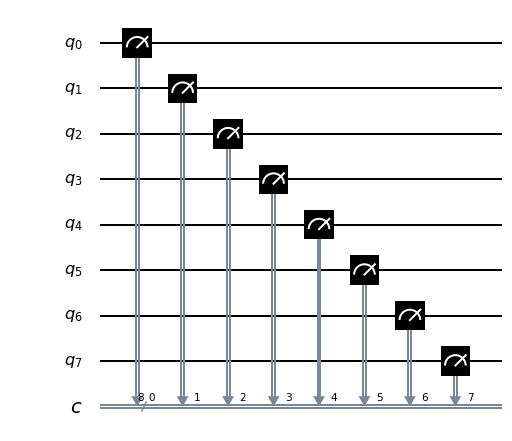

In [12]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)
for j in range(n):
    qc_output.measure(j,j)

qc_output.draw(output='mpl')



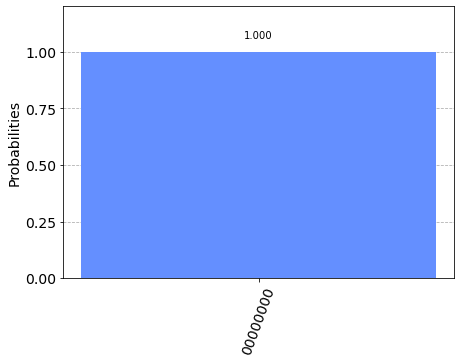

In [9]:
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [10]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)

qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

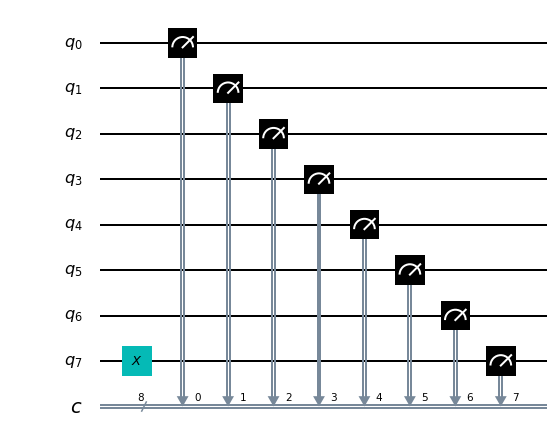

In [11]:
qc = qc_encode + qc_output
qc.draw(output='mpl',justify='none')

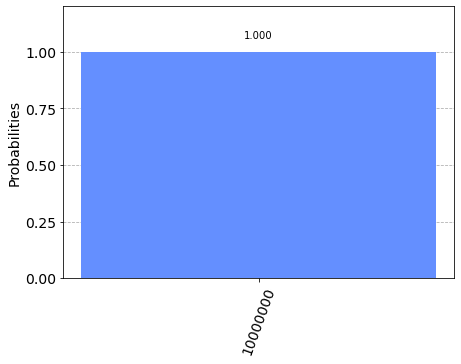

In [13]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [14]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

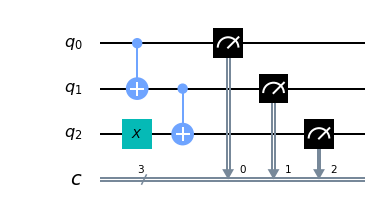

In [26]:
qc = QuantumCircuit(3,3)
qc.x(2)
qc.cx(0,1)
qc.cx(1,2)
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.draw(output='mpl')

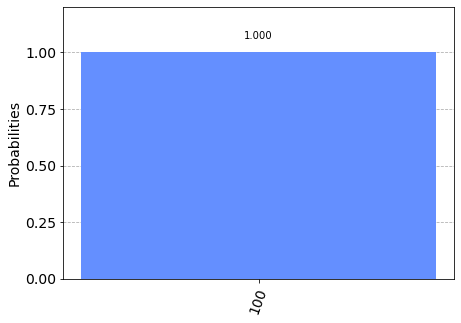

In [27]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

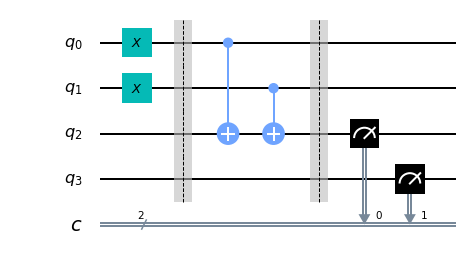

In [28]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw(output='mpl')

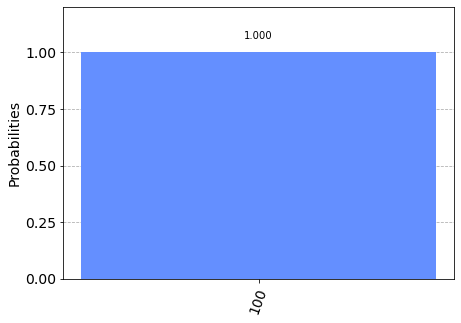

In [29]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

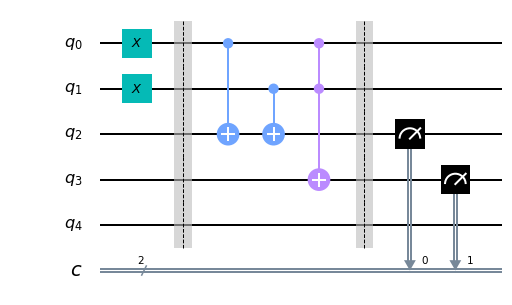

In [10]:
qc_ha = QuantumCircuit(5,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw(output='mpl')

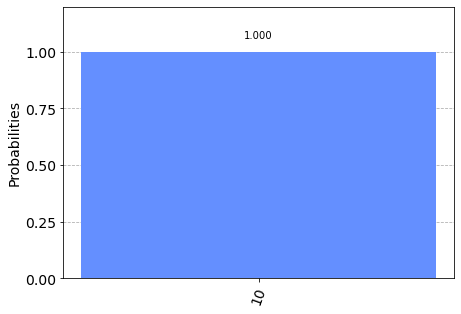

In [11]:
counts = execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [12]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [13]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

In [16]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw('text')  # Let's view our circuit (text drawing is required for the 'Initialize' gate due to a known bug in qiskit)

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

In [17]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit

In [20]:
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector
qc.measure_all()
qc.draw('text')

[0.+0.j 1.+0.j]


┌─────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas_0: ═══════════════════════╩═

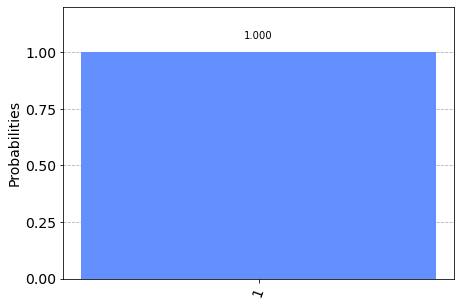

In [21]:
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)